<a href="https://colab.research.google.com/github/haron1100/MLSummerSchool/blob/master/Session_6_Practical_tips_for_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/content/gdrive/My Drive/data/BikeSharingDaily.csv')

In [3]:
def mse_cost(y, y_pred):
    diffs = y-y_pred
    squared_diffs = np.square(diffs)
    mean_squared_diff = np.mean(squared_diffs)
    return mean_squared_diff

Text(0, 0.5, 'cnt')

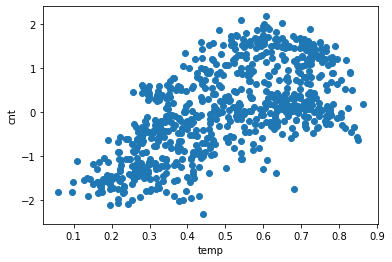

In [23]:
plt.scatter(df['temp'], y_norm)
plt.xlabel('temp')
plt.ylabel('cnt')

Text(0, 0.5, 'cnt')

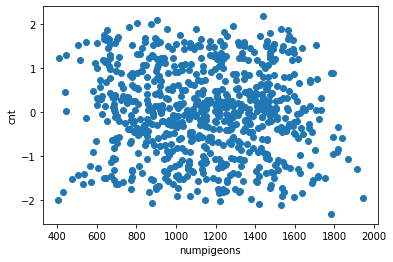

In [24]:
plt.scatter(df['numpigeons'], y_norm)
plt.xlabel('numpigeons')
plt.ylabel('cnt')

In [42]:
features = [df['temp'], df['hum'], df['windspeed'], df['atemp'], df['numpigeons']]
x = np.stack(features, axis=1)
y = np.array(df['cnt'])

def normalize(x):
    xnorm= np.copy(x)
    for i in range(x.shape[1]):
        this_column = x[:, i]
        my_mean, my_std = np.mean(this_column), np.std(this_column)
        xnorm[:, i] = (this_column-my_mean)/my_std
    return xnorm
x_norm = normalize(x)

y_mean, y_std = np.mean(y), np.std(y) #output normalization
y_norm = (y-y_mean)/y_std# normalized version of y

In [43]:
def random_search(n_iterations, x, y): #an optimiser
    lowest_cost = float("inf") #lowest cost ive seen thus far
    for i in range(n_iterations):#in a loop, until we do n_iterations
        m = np.random.randn(len(features)) #randomly sample values for m
        b = np.random.randn() #randomly sample values for b

        y_pred = np.zeros(len(y))
        for i in range(len(features)):
            y_pred += x[:, i] * m[i]
        y_pred += b
        
        cost = mse_cost(y, y_pred) #calculate the cost of that prediction
        if cost<lowest_cost: #if its the lowest cost we have achieved thus far
            best_m = m #store the values for this m in a a variable
            best_b = b #store the values for this b in a a variable
            lowest_cost = cost #set the lowest cost to this new lowest cost
    return best_m, best_b #return best m and b values

found parameters m: [ 0.60552172 -0.03611596 -0.18265491 -0.01926763  0.0096226 ] b: -0.1289243916561493
cost 2225089.437924066


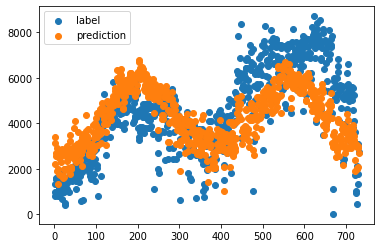

In [45]:
m, b = random_search(10000, x_norm, y_norm)

y_pred = np.zeros(len(y))
for i in range(len(features)):
    y_pred += x_norm[:, i] * m[i]
y_pred += b

y_pred = (y_pred*y_std) + y_mean

cost = mse_cost(y, y_pred)
print('found parameters m:',m , 'b:', b)
print('cost', cost)
plt.scatter(df['instant'], y, label="label")
plt.scatter(df['instant'], y_pred, label="prediction")
plt.legend()
plt.show()